<a href="https://colab.research.google.com/github/Mohamed-oosama/Mohamed_Kamel/blob/main/project_code_Aplha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ew!pip install opendatasets

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
od.download('https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: few
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


100%|██████████| 21.4M/21.4M [00:00<00:00, 551MB/s]

In [4]:
data = pd.read_csv('/content/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv')

In [5]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [6]:
data['HadHeartAttack'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

Is

In [9]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [10]:
data.duplicated().sum()

np.int64(9)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(246013, 40)

# **Visualization**

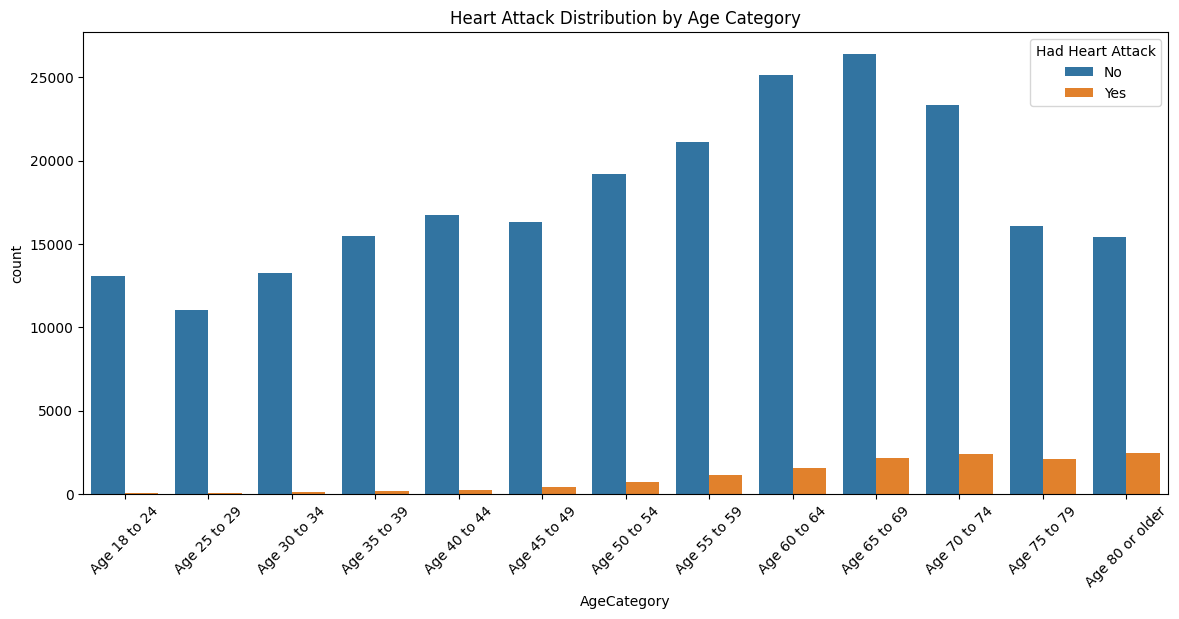

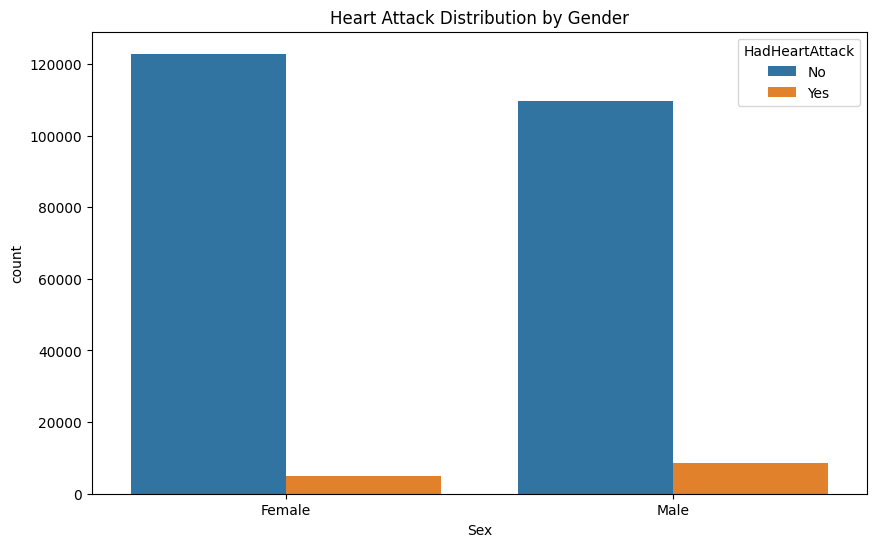

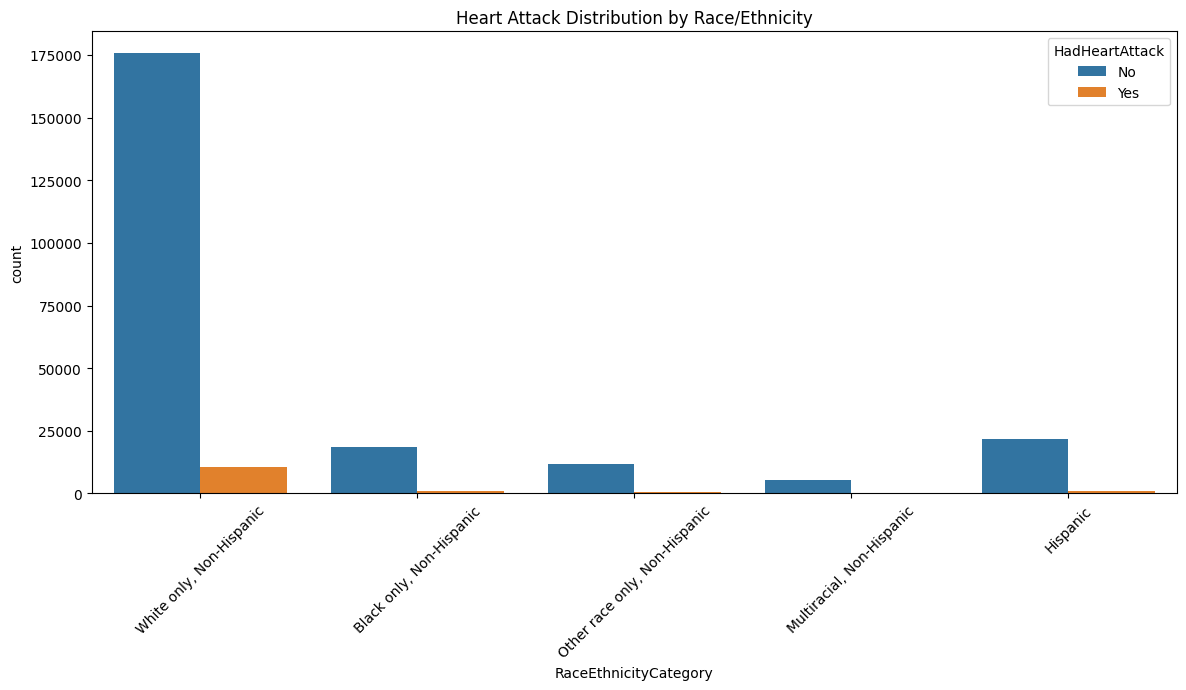

In [13]:
# Age distribution by heart attack status
plt.figure(figsize=(14, 6))
sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=data,
             order=sorted(data['AgeCategory'].unique()))
plt.title('Heart Attack Distribution by Age Category')
plt.xticks(rotation=45)
plt.legend(title='Had Heart Attack')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='HadHeartAttack', data=data)
plt.title('Heart Attack Distribution by Gender')
plt.show()

# Race/Ethnicity distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=data)
plt.title('Heart Attack Distribution by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

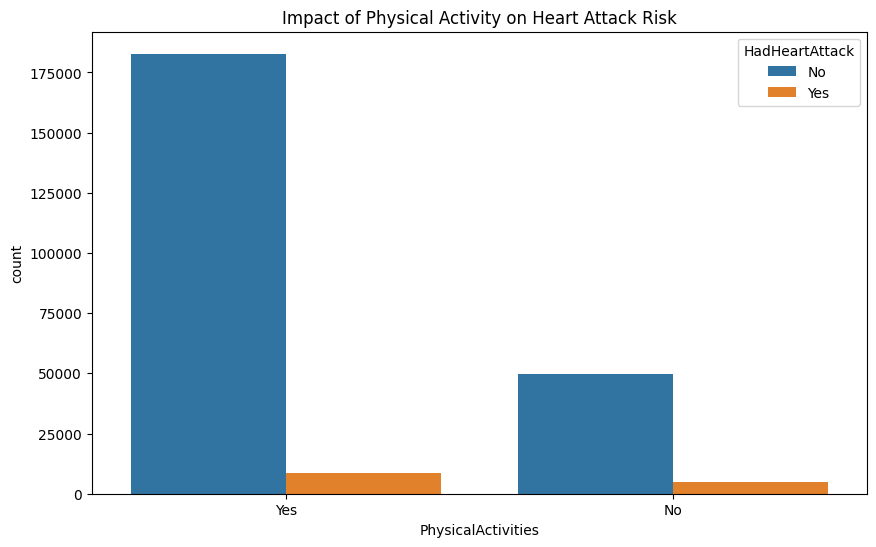

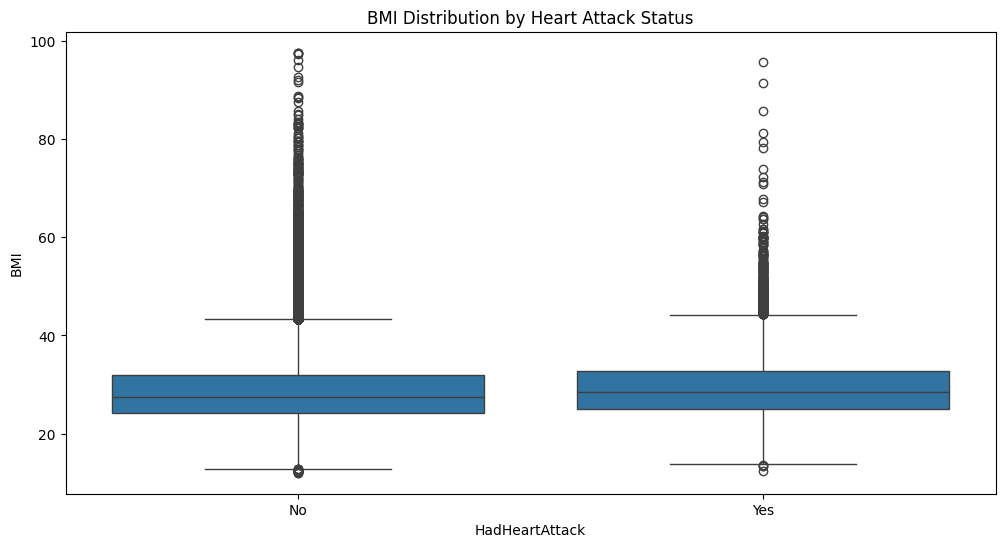

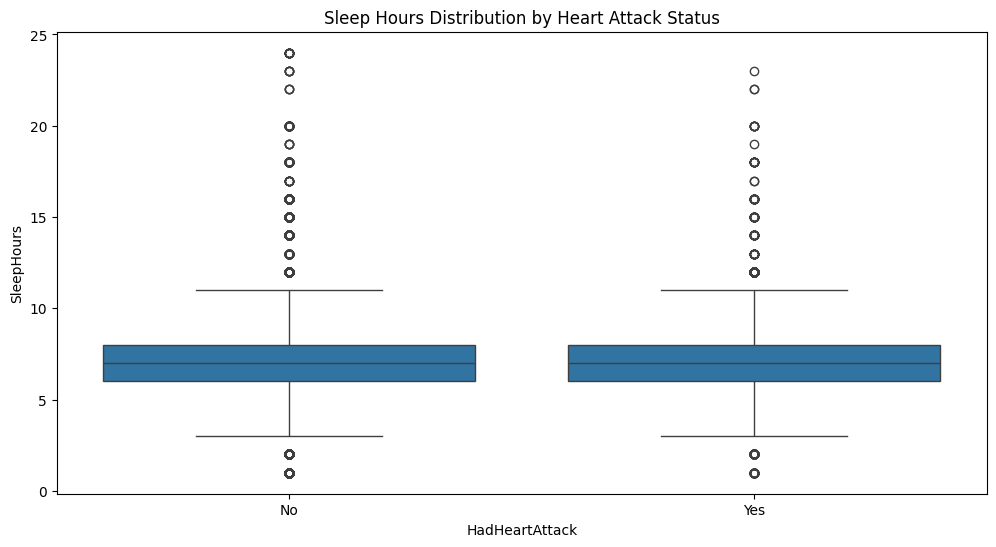

In [14]:
# Physical activity impact
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysicalActivities', hue='HadHeartAttack', data=data)
plt.title('Impact of Physical Activity on Heart Attack Risk')
plt.show()

# BMI distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='HadHeartAttack', y='BMI', data=data)
plt.title('BMI Distribution by Heart Attack Status')
plt.show()

# Sleep hours impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='HadHeartAttack', y='SleepHours', data=data)
plt.title('Sleep Hours Distribution by Heart Attack Status')
plt.show()


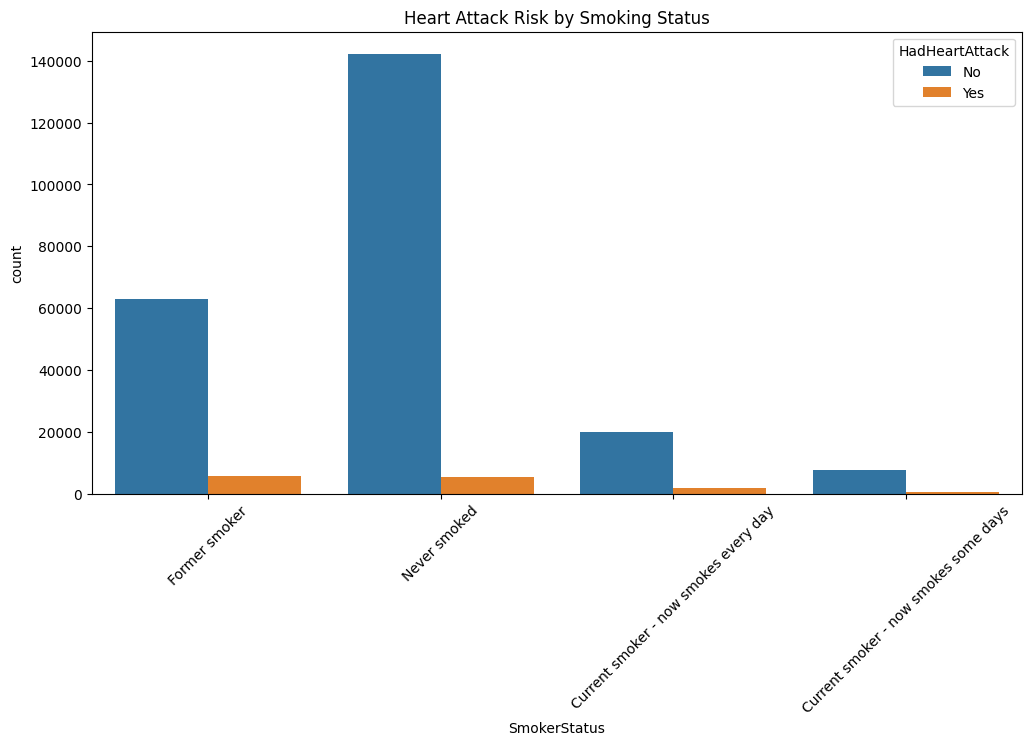

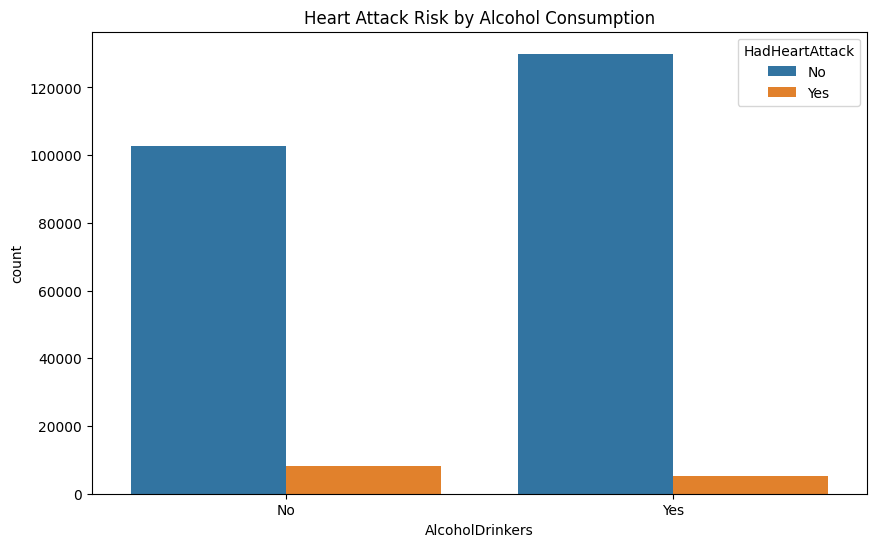

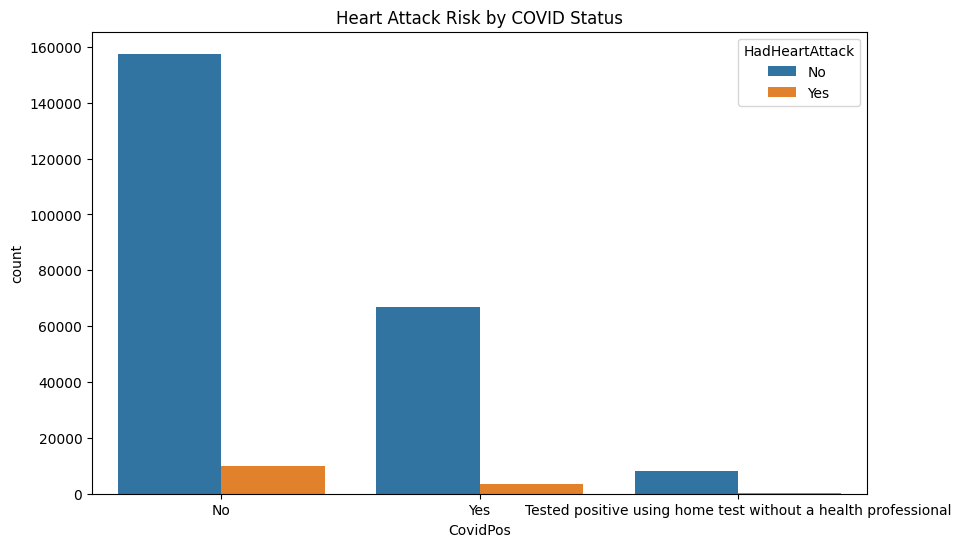

In [15]:
# Smoking status impact
plt.figure(figsize=(12, 6))
sns.countplot(x='SmokerStatus', hue='HadHeartAttack', data=data)
plt.title('Heart Attack Risk by Smoking Status')
plt.xticks(rotation=45)
plt.show()

# Alcohol consumption
plt.figure(figsize=(10, 6))
sns.countplot(x='AlcoholDrinkers', hue='HadHeartAttack', data=data)
plt.title('Heart Attack Risk by Alcohol Consumption')
plt.show()

# COVID impact
plt.figure(figsize=(10, 6))
sns.countplot(x='CovidPos', hue='HadHeartAttack', data=data)
plt.title('Heart Attack Risk by COVID Status')
plt.show()

# **Label Encoding**

In [16]:
data = data.applymap(lambda x: 1 if x =='Yes' else (0 if x=='No' else x))
data.head()

/tmp/ipython-input-32971735.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x =='Yes' else (0 if x=='No' else x))


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,1.60,71.67,27.99,0,0,1,1,"Yes, received Tdap",0,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,...,1.78,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,...,1.85,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,1.70,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,1
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,...,1.55,79.38,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  int64  
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  int64  
 10  HadAngina                  246013 non-null  int64  
 11  HadStroke                  246013 non-null  int64  
 12  HadAsthma                  246013 non-null  int64  
 13  HadSkinCancer              246013 

In [18]:
data['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [19]:
data = data[data['CovidPos'] != 'Tested positive using home test without a health professional']


In [20]:
data.drop(['RemovedTeeth', 'LastCheckupTime','State','TetanusLast10Tdap'], axis=1, inplace=True)


In [21]:
object_cols = ['HadDiabetes','GeneralHealth','Sex','CovidPos','ECigaretteUsage','AgeCategory','SmokerStatus','RaceEthnicityCategory' ]

le = LabelEncoder()

for col in object_cols:
    data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237621 entries, 0 to 246021
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        237621 non-null  int64  
 1   GeneralHealth              237621 non-null  int64  
 2   PhysicalHealthDays         237621 non-null  float64
 3   MentalHealthDays           237621 non-null  float64
 4   PhysicalActivities         237621 non-null  int64  
 5   SleepHours                 237621 non-null  float64
 6   HadHeartAttack             237621 non-null  int64  
 7   HadAngina                  237621 non-null  int64  
 8   HadStroke                  237621 non-null  int64  
 9   HadAsthma                  237621 non-null  int64  
 10  HadSkinCancer              237621 non-null  int64  
 11  HadCOPD                    237621 non-null  int64  
 12  HadDepressiveDisorder      237621 non-null  int64  
 13  HadKidneyDisease           237621 

# **Heatmap**

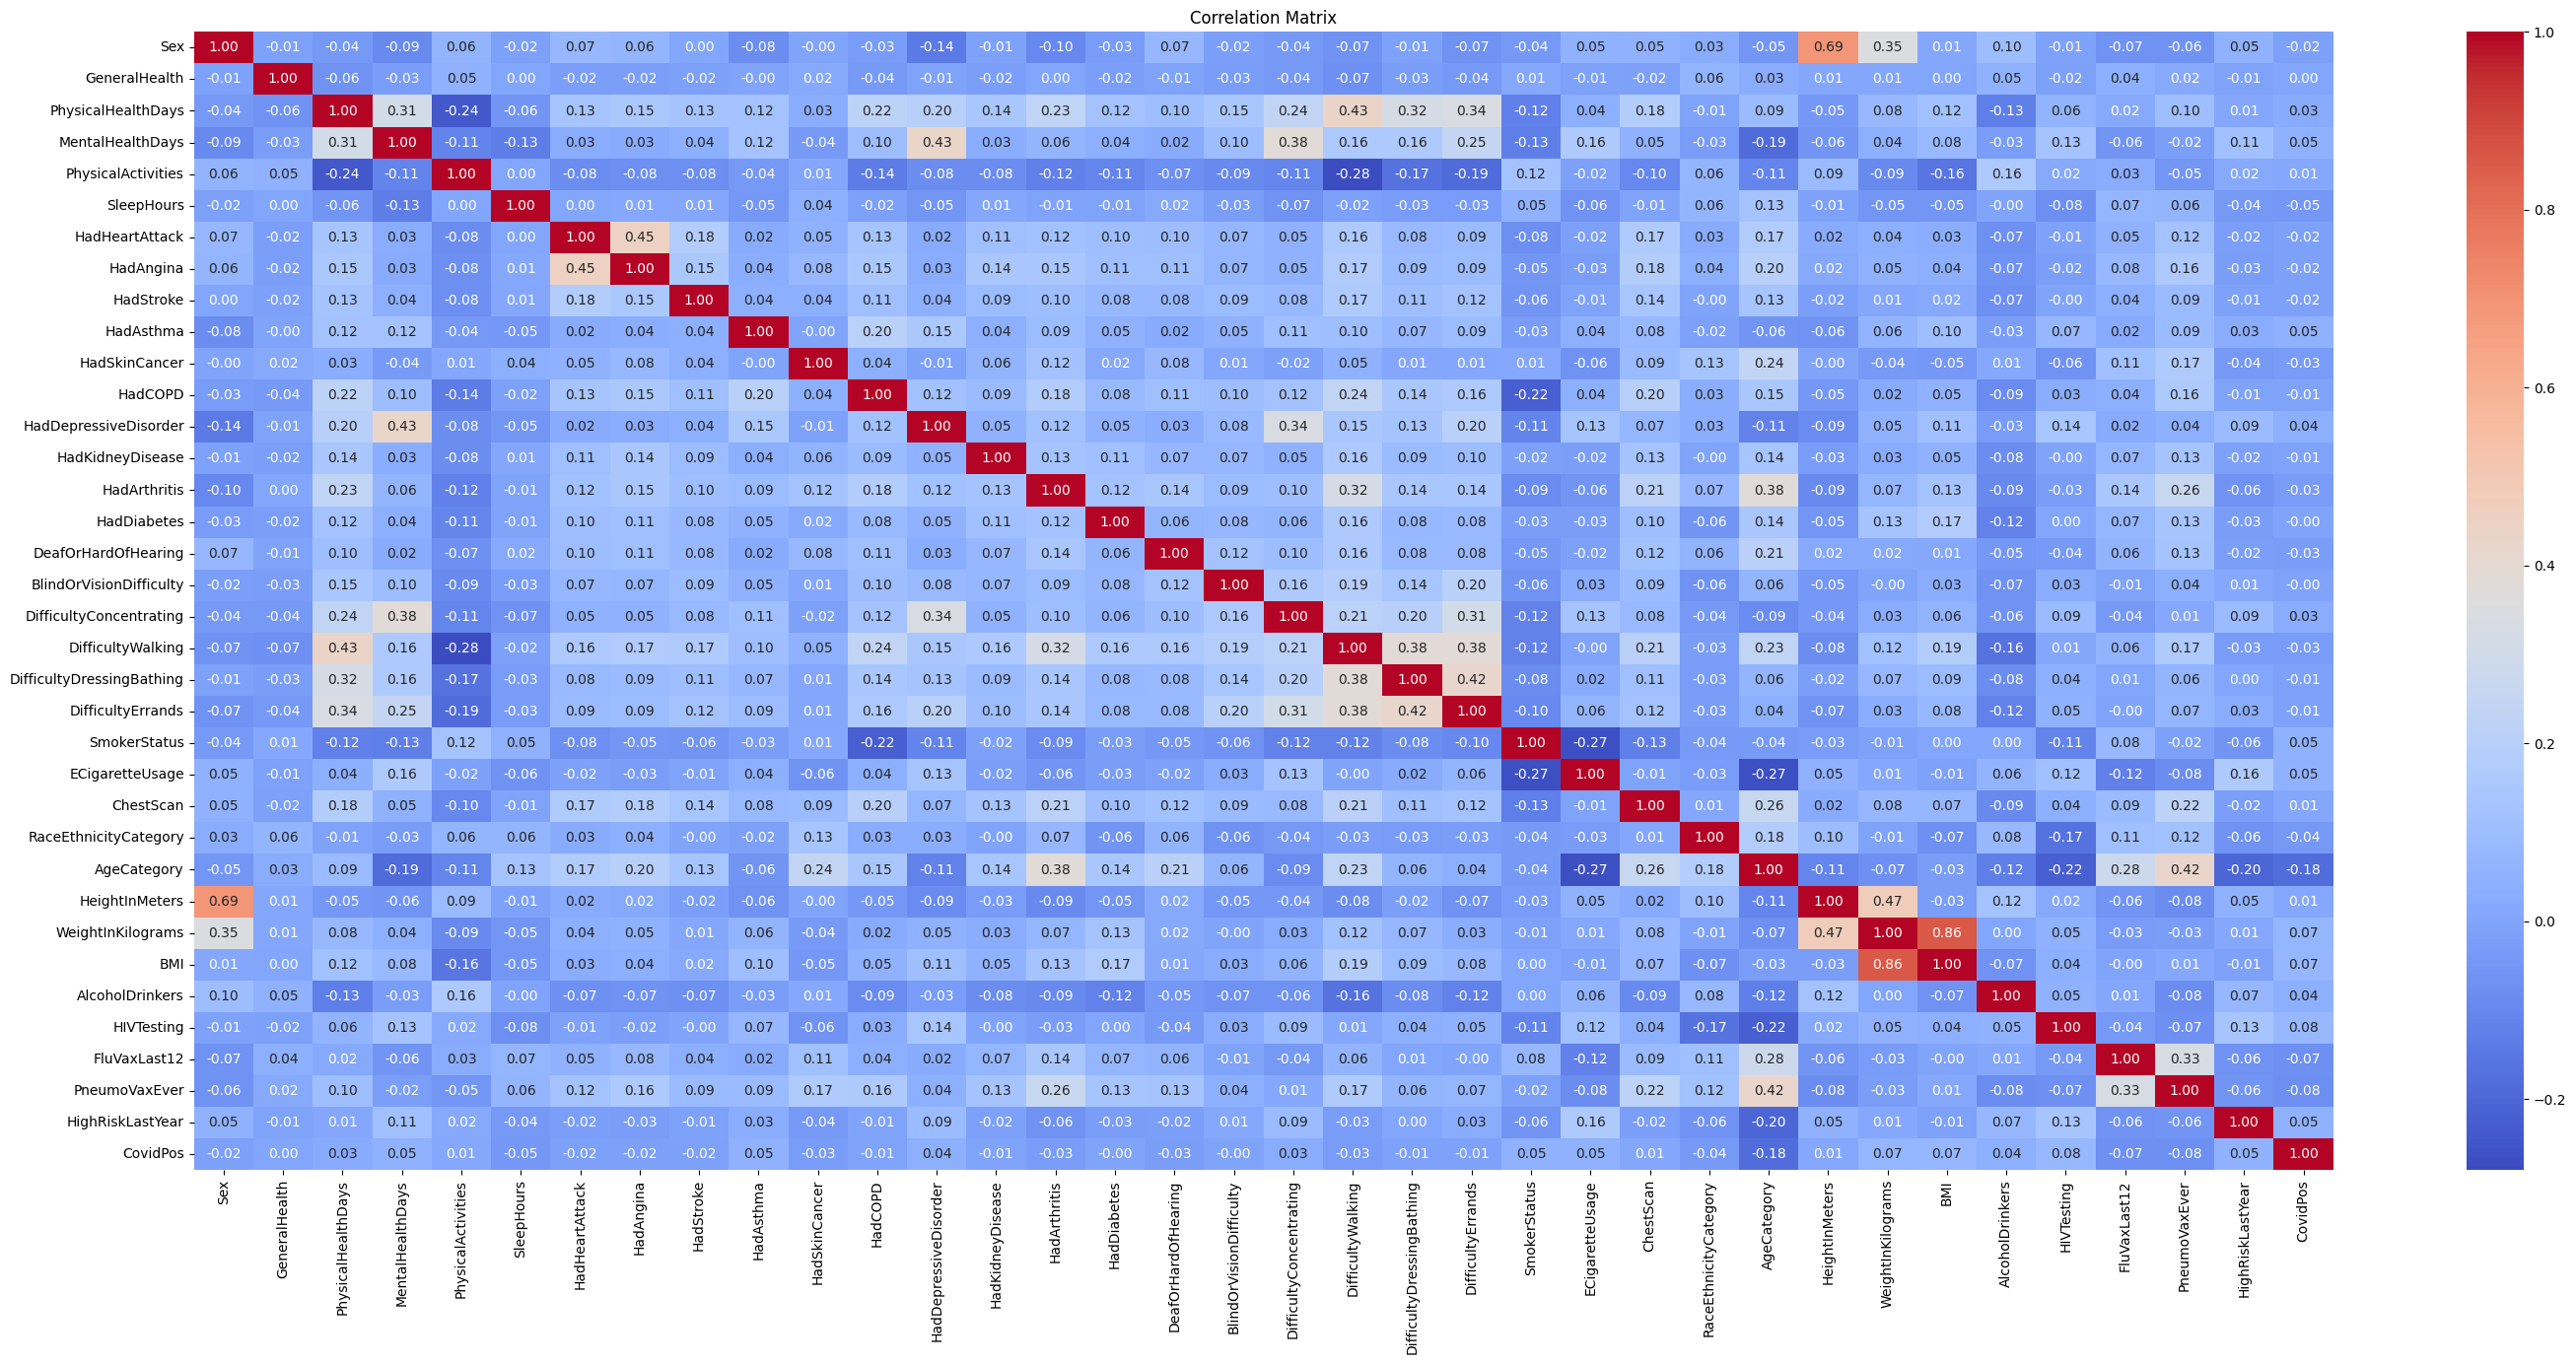

In [23]:
# correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(35,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,4,4.0,0.0,1,9.0,0,0,0,0,...,9,1.60,71.67,27.99,0,0,1,1,0,0
1,1,4,0.0,0.0,1,6.0,0,0,0,0,...,10,1.78,95.25,30.13,0,0,1,1,0,0
2,1,4,0.0,0.0,0,8.0,0,0,0,0,...,11,1.85,108.86,31.66,1,0,0,1,0,1
3,0,1,5.0,0.0,1,9.0,0,0,0,0,...,12,1.70,90.72,31.32,0,0,1,1,0,1
4,0,2,3.0,15.0,1,5.0,0,0,0,0,...,12,1.55,79.38,33.07,0,0,1,1,0,0


# **Scaling**

# **Remove outliers**

In [28]:
def remove_outliers(data):
    numeric_cols = data.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if col == 'HadHeartAttack':
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) | (data[col] <= upper)]
    return data

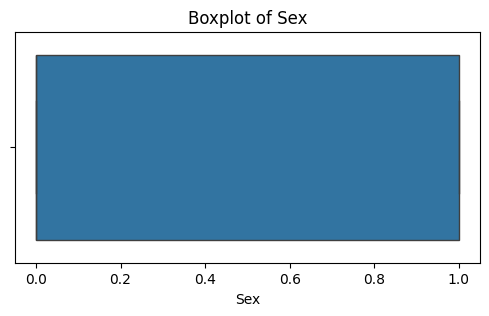

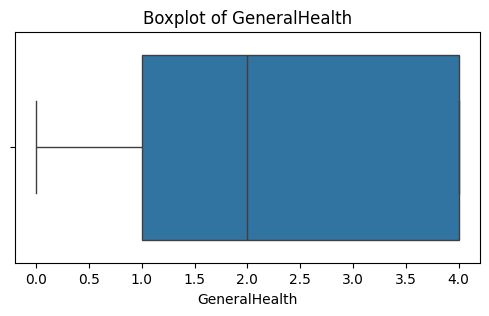

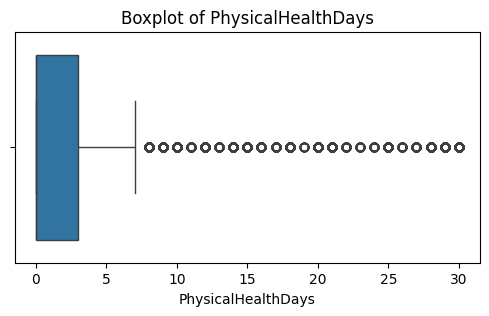

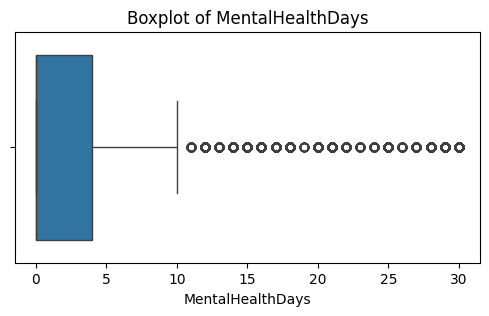

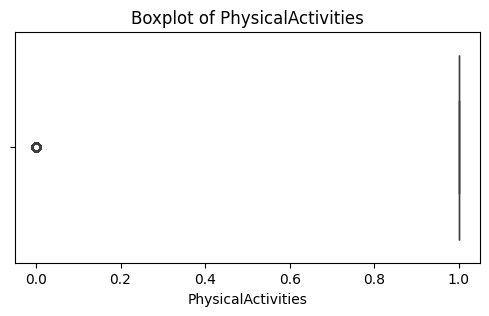

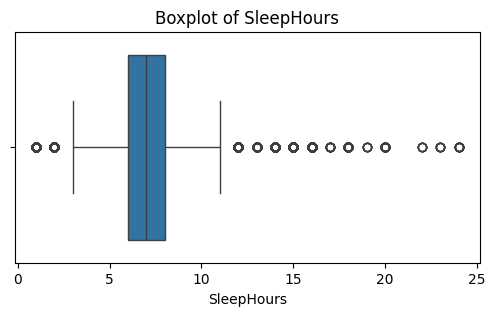

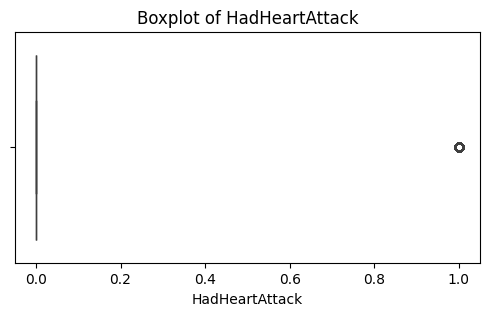

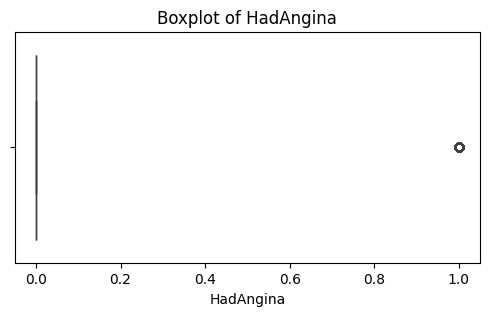

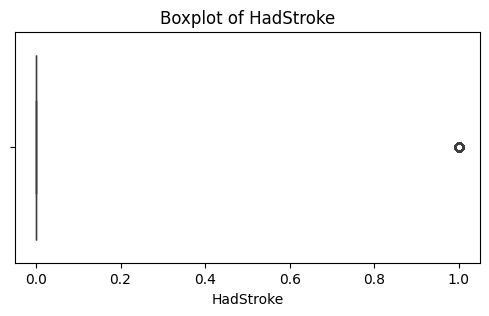

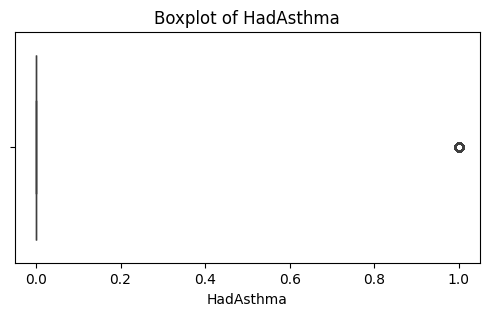

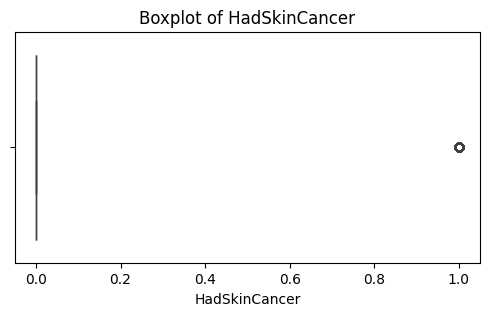

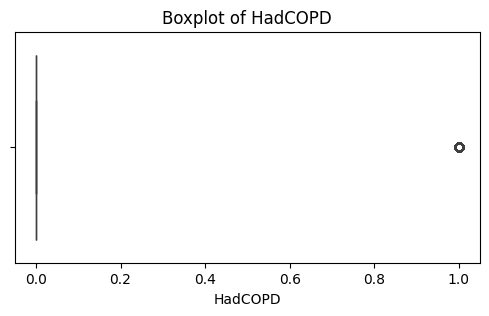

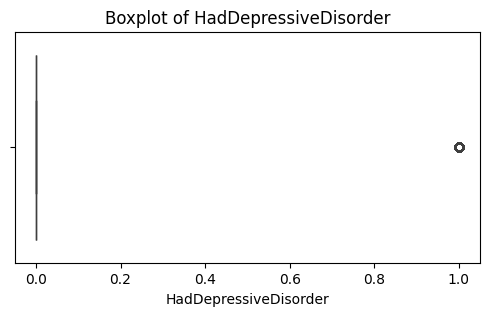

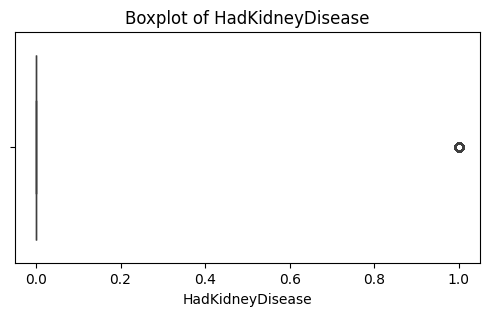

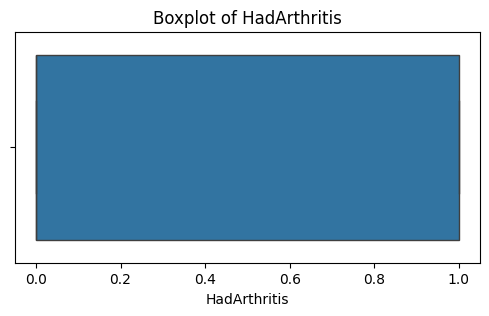

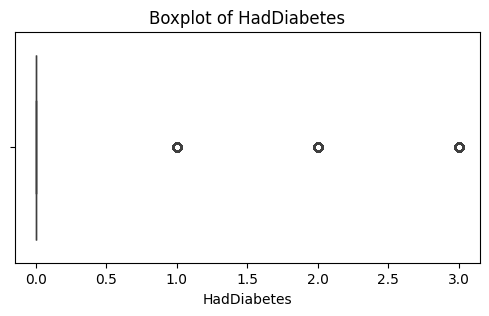

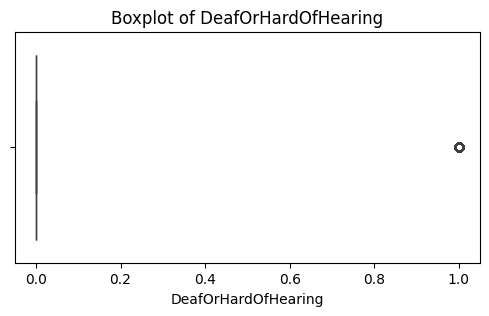

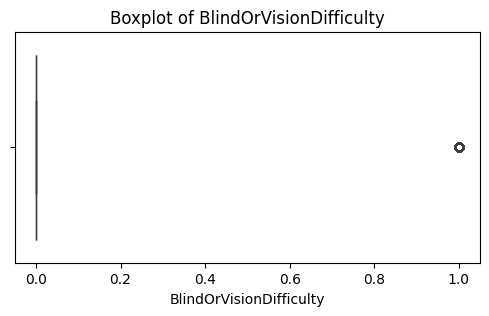

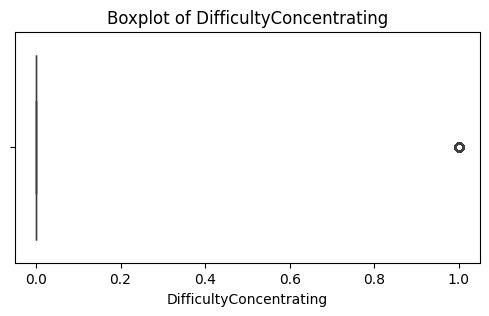

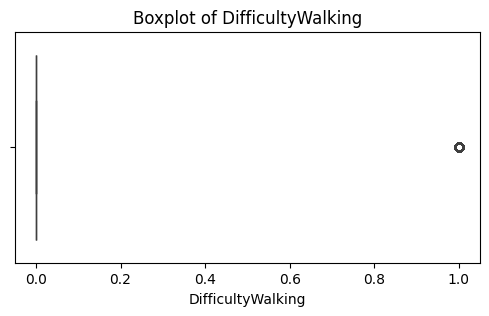

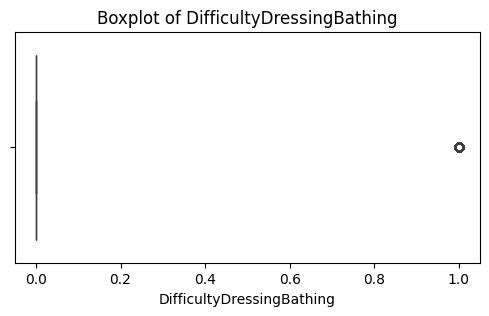

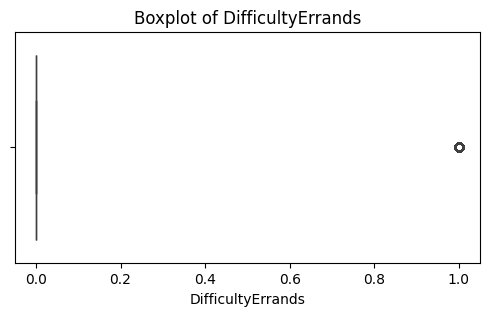

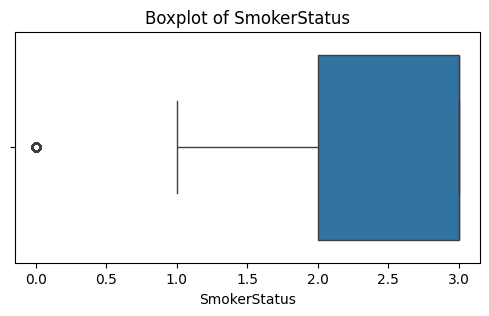

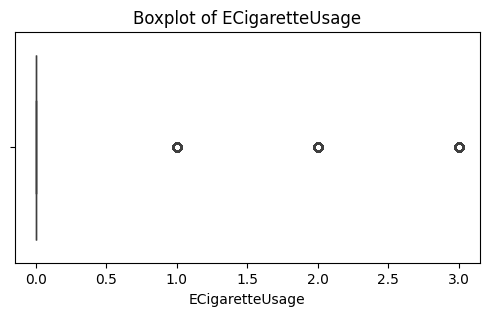

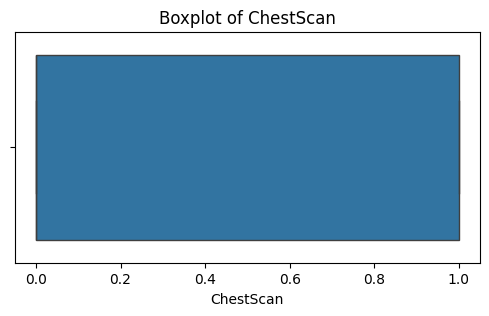

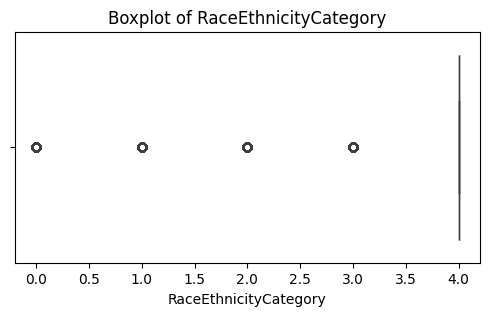

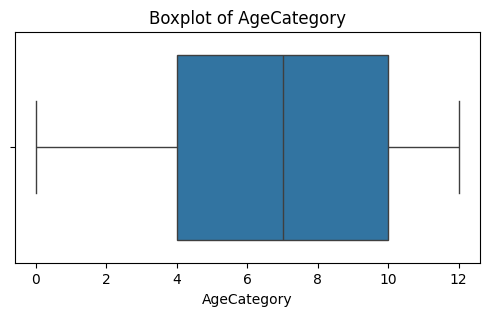

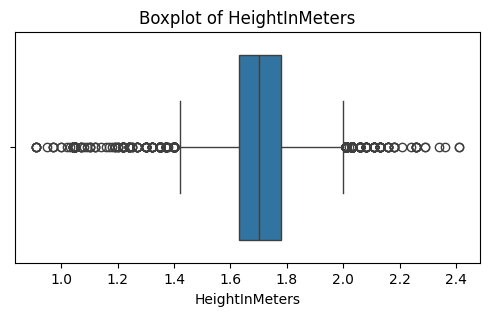

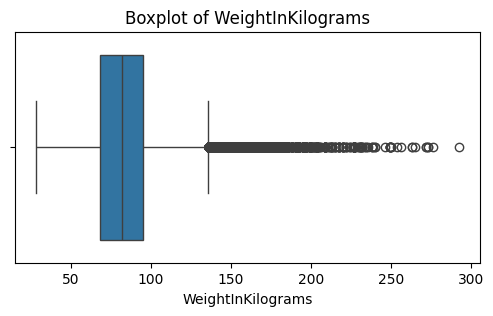

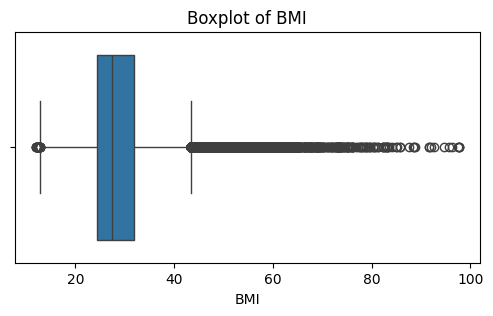

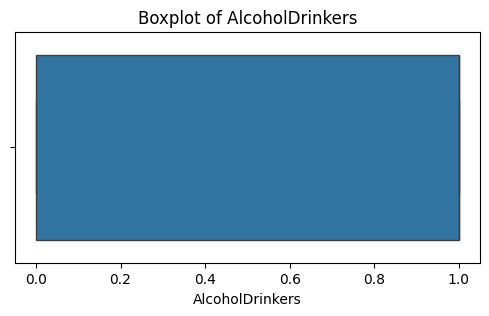

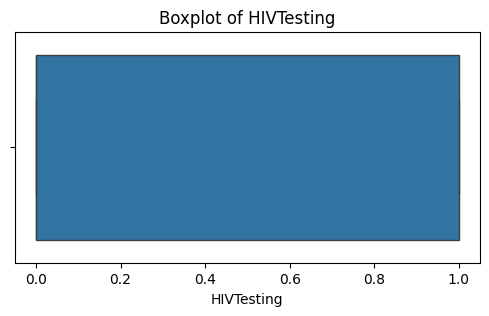

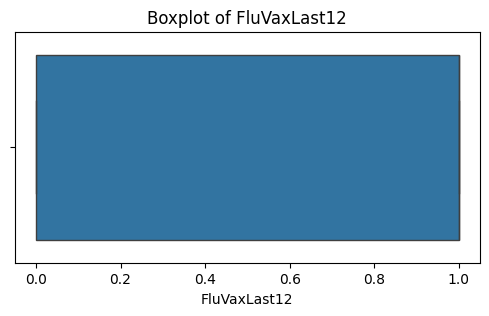

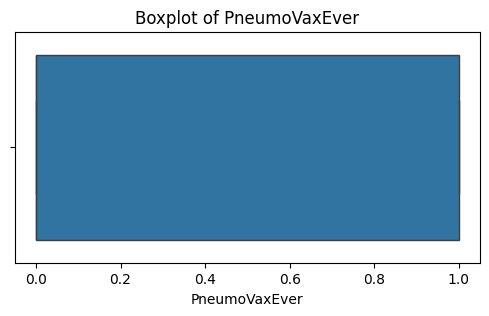

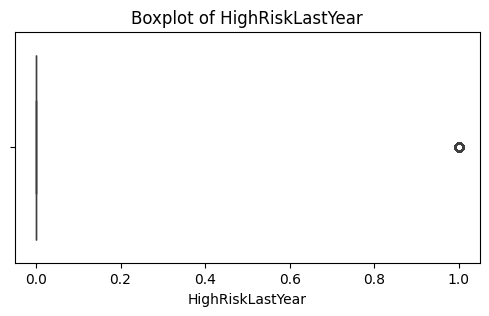

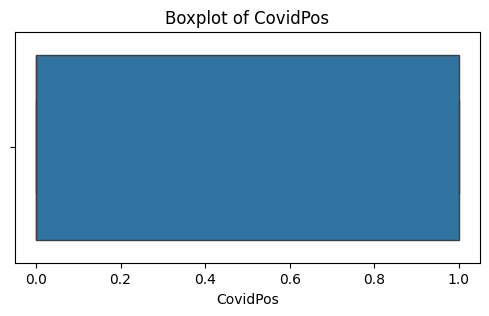

In [29]:
for col in data:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# **Model**

In [30]:
data['HadHeartAttack'] = data['HadHeartAttack'].abs()


In [31]:
x = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


In [33]:
y_train.value_counts()

,count
HadHeartAttack,
0,179535
1,10561


In [34]:
y_test

,HadHeartAttack
136847,0
100760,0
68560,0
221741,0
202148,0
...,...
29855,0
156748,0
106826,0
217004,0


In [35]:
y_train.unique()

array([1, 0])

In [36]:
y_test.nunique()

2

# **Supervised Learning**

### **Logistic Regression**

In [54]:
# Create a Logistic Regression model

logistic_model = LogisticRegression(
                                     max_iter=500,
                                     penalty='l2',
                                     C=1.5,
                                     solver='lbfgs',
                                     random_state=42
                                     )


logistic_model.fit(x_train, y_train)

# predictions
y_pred_log = logistic_model.predict(x_test)
y_pred_train_log = logistic_model.predict(x_train)

# Accuracy
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_log):.6%}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.6%}")


Train Accuracy: 94.710041%
Accuracy: 94.710153%


In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive']
)

print("\nConfusion Matrix:\n", conf_matrix_df)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative               44363                 522
Actual Positive                1992                 648

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     44885
           1       0.55      0.25      0.34      2640

    accuracy                           0.95     47525
   macro avg       0.76      0.62      0.66     47525
weighted avg       0.93      0.95      0.94     47525



### **Decision Tree**

In [58]:
# Create a Decision Tree Classifier

data_tree = DecisionTreeClassifier(

    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=12,

)

# Train the model
data_tree.fit(x_train, y_train)

# predictions
y_pred_dt = data_tree.predict(x_test)

print(f"Train Accuracy: {data_tree.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {data_tree.score(x_test, y_test):.2%}")


Train Accuracy: 96.35%
Test Accuracy: 93.99%


### **Random Forest**

In [62]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=12,
    n_jobs=-1
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Train Accuracy: 0.941255996969952
Accuracy: 0.9168437664387165


### **Linear Regression**

In [44]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred_lin = model.predict(x_test)
y_pred_train_lin = model.predict(x_train)

            MAE       MSE        R2
Train  0.085754  0.040310  0.231754
Test   0.085952  0.040631  0.225544


In [45]:
mae_train = mean_absolute_error(y_train, y_pred_train_lin)
mse_train = mean_squared_error(y_train, y_pred_train_lin)
r2_train = r2_score(y_train, y_pred_train_lin)

print("MAE:", mae_train)
print("MSE:", mse_train)
print("R2:", r2_train)


MAE: 0.08575383261480049
MSE: 0.04030962313042629
R2: 0.23175361348114876


### **MinMaxScaler**

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

### **K-Nearest Neighbors**

In [68]:
# Create a Knn model

knn_model = KNeighborsClassifier(
                                  n_neighbors=5,
                                  n_jobs=-1
                                  )

# train
knn_model.fit(x_train_scaled, y_train)

# predictions
y_pred_knn = knn_model.predict(x_train_scaled)
y_pred_test = knn_model.predict(x_test_scaled)

print(f'Train Accuracy: {accuracy_score(y_train, y_pred_knn):.4f}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')

Train Accuracy: 0.9541
Test Accuracy: 0.9443


### **XGBoost model**

In [69]:
# Create a XGBoost model

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2%}")

XGBoost Accuracy: 94.76%


### **SVC**

In [ ]:
# Create an SVC model
svc_model = SVC(random_state=42)

# Train the model
svc_model.fit(x_train_scaled, y_train)

# predictions
y_pred_svc = svc_model.predict(x_test_scaled)

# Accuracy
print(f"SVC Accuracy: {accuracy_score(y_test, y_pred_svc):.2%}")